<a href="https://colab.research.google.com/github/PacktPublishing/Machine-Learning-for-Time-Series-with-Python/blob/master/chapter9/Markov_switching_model.ipynb" target="_parent\"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

              date      rgnp
1959-04-01  1959.0  2.525579
1959-07-01  1959.0 -0.119224
1959-10-01  1959.0  0.350065
1960-01-01  1960.0  2.243821
1960-04-01  1960.0 -0.467360


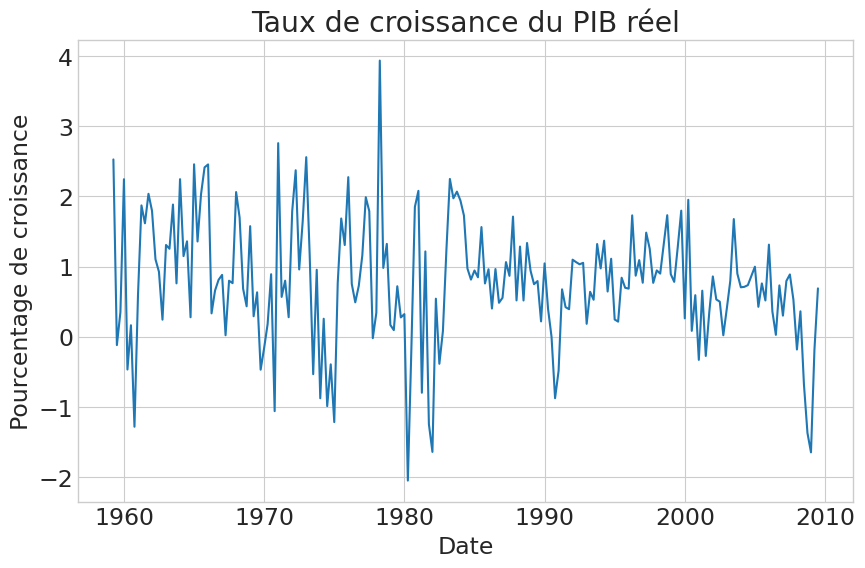

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Utiliser un dataset intégré dans statsmodels
data = sm.datasets.macrodata.load_pandas().data
# Sélectionner le PIB réel et créer un taux de croissance
gdp = data['realgdp']
growth_rate = 100 * gdp.pct_change().dropna()

data.head()

# Créer un DataFrame
dta = pd.DataFrame({
    'date': data['year'][1:],
    'rgnp': growth_rate.values
})

# Créer un index de date trimestriel
dates = pd.date_range(start='1959-03-31', periods=len(dta), freq='QS')
dta.index = dates
dta_hamilton = dta.rgnp

# Afficher les premières lignes
print(dta.head())

# Visualiser
plt.figure(figsize=(10, 6))
plt.plot(dta.index, dta_hamilton)
plt.title('Taux de croissance du PIB réel')
plt.xlabel('Date')
plt.ylabel('Pourcentage de croissance')
plt.grid(True)
plt.show()


HTTPError: HTTP Error 403: Forbidden

In [13]:
# Plot the data
dta_hamilton.plot(title='Growth rate of Real GNP', figsize=(16, 6))

<Axes: title={'center': 'Growth rate of Real GNP'}>

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

In [14]:
# Fit the model
mod_hamilton = sm.tsa.MarkovAutoregression(dta_hamilton, k_regimes=2, order=4, switching_ar=False)
res_hamilton = mod_hamilton.fit()

In [15]:
print(res_hamilton.summary())

                         Markov Switching Model Results                         
Dep. Variable:                     rgnp   No. Observations:                  198
Model:             MarkovAutoregression   Log Likelihood                -240.184
Date:                  Thu, 08 May 2025   AIC                            498.368
Time:                          12:26:06   BIC                            527.963
Sample:                      04-01-1959   HQIC                           510.347
                           - 07-01-2009                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7659        nan        nan        nan         nan         nan
                             Regime 

In [16]:
res_hamilton.expected_durations

array([1.9557625 , 2.07753857])

In [17]:
from pandas_datareader.data import DataReader
from datetime import datetime
usrec = DataReader('USREC', 'fred', start=datetime(1947, 1, 1), end=datetime(2013, 4, 1))

In [18]:
usrec.head()

,USREC
DATE,
1947-01-01,0
1947-02-01,0
1947-03-01,0
1947-04-01,0
1947-05-01,0


In [19]:
_, ax = plt.subplots(1, figsize=(16, 6))
ax.plot(res_hamilton.filtered_marginal_probabilities[0])
ax.fill_between(
    usrec.index, 0, 1, where=usrec['USREC'].values,
    color='gray', alpha=0.3
)
ax.set(
    xlim=(dta_hamilton.index[4], dta_hamilton.index[-1]),
    ylim=(0, 1),
    title='Filtered probability of recession'
);

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne